In [10]:
!pip install -U textblob
!python -m textblob.download_corpora


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
[nltk_data] Downloading package brown to /Users/suqiulin/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/suqiulin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/suqiulin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/suqiulin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/suqiulin/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/suqiulin/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [11]:
from textblob import TextBlob

In [2]:
import pandas as pd
file_path = '/Users/suqiulin/Desktop/100k.csv'
df=pd.read_csv(file_path)
df.head()

,author,body,created_utc,id,submission,subreddit,subreddit_id
0,ForeskinStealer420,A combination of (1) and (2) would make you th...,2024-09-14 22:40:45,ln5r3zv,1fgx26q,datascience,t5_2sptq
1,lakeland_nz,4. Shift to something less technically. Becom...,2024-09-14 22:54:52,ln5tqg8,1fgx26q,datascience,t5_2sptq
2,Moscow_Gordon,Maybe look into solution architect positions f...,2024-09-15 00:16:38,ln67tl2,1fgx26q,datascience,t5_2sptq
3,Numerous-Tip-5097,"Hey, I am on the same boat with less experienc...",2024-09-15 01:37:26,ln6jubq,1fgx26q,datascience,t5_2sptq
4,hornswoggle_choco05,I'd probably shake things up and try a new pat...,2024-09-15 01:58:02,ln6mtyc,1fgx26q,datascience,t5_2sptq


In [13]:
def get_sentiment(text):
    return TextBlob(text).polarity

In [4]:
df[['score']] = df['body'].apply(get_sentiment).apply(pd.Series)
df['polarity'] = df['score'].apply(lambda x: 'pos' if x > 0 else ('neg' if x < 0 else 'neu'))

df.head(5)

,author,body,created_utc,id,submission,subreddit,subreddit_id,score,polarity
0,ForeskinStealer420,A combination of (1) and (2) would make you th...,2024-09-14 22:40:45,ln5r3zv,1fgx26q,datascience,t5_2sptq,0.250000,pos
1,lakeland_nz,4. Shift to something less technically. Becom...,2024-09-14 22:54:52,ln5tqg8,1fgx26q,datascience,t5_2sptq,0.099150,pos
2,Moscow_Gordon,Maybe look into solution architect positions f...,2024-09-15 00:16:38,ln67tl2,1fgx26q,datascience,t5_2sptq,0.250000,pos
3,Numerous-Tip-5097,"Hey, I am on the same boat with less experienc...",2024-09-15 01:37:26,ln6jubq,1fgx26q,datascience,t5_2sptq,0.098148,pos
4,hornswoggle_choco05,I'd probably shake things up and try a new pat...,2024-09-15 01:58:02,ln6mtyc,1fgx26q,datascience,t5_2sptq,0.255682,pos


In [6]:
df = df[['body','id','score','polarity']]
df.to_csv('/Users/suqiulin/Desktop/sentiment_by_textblob.csv', index=False)
print("Sentiment analysis results saved")

Sentiment analysis results saved


In [7]:
df['polarity'].value_counts()

polarity
pos    55182
neu    29137
neg    23402
Name: count, dtype: int64

In [8]:
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


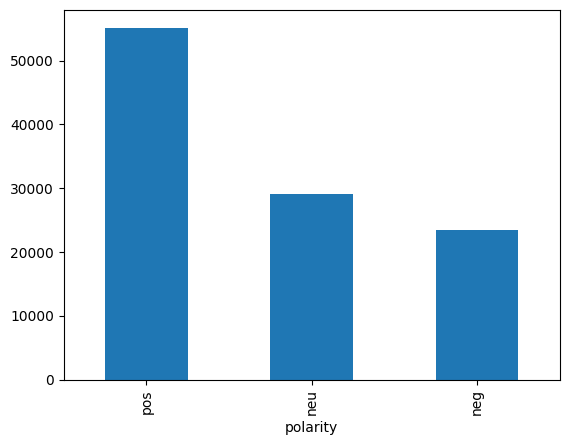

In [9]:
df['polarity'].value_counts().plot(kind='bar')
plt.show()

# Evaluation

In [12]:
import pandas as pd
file_path = '/Users/suqiulin/Downloads/Reddit_Data.csv'
df_eval=pd.read_csv(file_path)
df_eval.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [16]:
def get_sentiment_na(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0  # Return neutral polarity for non-strings

In [22]:
df_eval[['score']] = df_eval['clean_comment'].apply(get_sentiment_na).apply(pd.Series)
df_eval['predicted_polarity'] = df_eval['score'].apply(lambda x: 'pos' if x > 0 else ('neg' if x < 0 else 'neu'))
df_eval['labeled_polarity'] = df_eval['category'].apply(lambda x: 'pos' if x > 0 else ('neg' if x < 0 else 'neu'))
df_eval.head()

,clean_comment,category,score,predicted_polarity,labeled_polarity
0,family mormon have never tried explain them t...,1,0.216667,pos,pos
1,buddhism has very much lot compatible with chr...,1,0.142488,pos,pos
2,seriously don say thing first all they won get...,-1,-0.122222,neg,neg
3,what you have learned yours and only yours wha...,0,0.000000,neu,neu
4,for your own benefit you may want read living ...,1,0.081883,pos,pos


In [29]:
!pip install seaborn
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [35]:
y_true = df_eval['labeled_polarity']
y_pred = df_eval['predicted_polarity']
cm = confusion_matrix(y_true, y_pred, labels=['pos', 'neg', 'neu'])

accuracy = accuracy_score(y_true, y_pred)

# Compute recall (per class average)
recall = recall_score(y_true, y_pred, average=None, labels=['pos', 'neg', 'neu'])

# Compute F1 Score (weighted)
f1 = f1_score(y_true, y_pred, average='weighted')

# Type 1 Error (False Positive Rate) - per class
type_1_error = 1 - recall  # Since FPR = 1 - recall (when averaged across classes)

# Compute Type 2 Error (False Negative Rate)
# Type 2 error (FNR) is simply: 1 - recall per class
type_2_error = 1 - recall

# Output the results
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy}")
print(f"Recall (per class): {recall}")
print(f"Type 1 Error (per class): {type_1_error}")
print(f"Type 2 Error (per class): {type_2_error}")
print(f"F1 Score: {f1}")

Confusion Matrix:
[[15827     3     0]
 [    0  8277     0]
 [    0     0 13142]]
Accuracy: 0.9999194609251255
Recall (per class): [0.99981049 1.         1.        ]
Type 1 Error (per class): [0.00018951 0.         0.        ]
Type 2 Error (per class): [0.00018951 0.         0.        ]
F1 Score: 0.9999194644054796


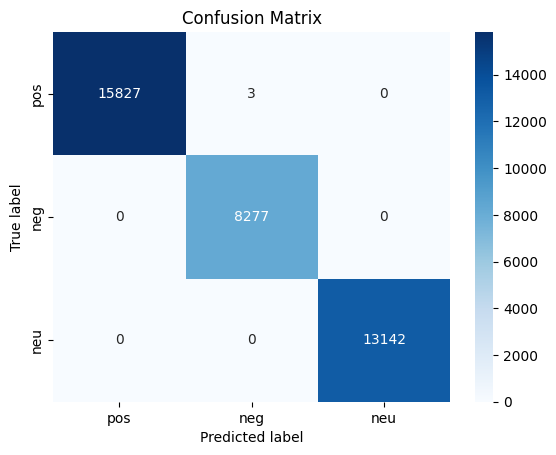

In [27]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['pos', 'neg', 'neu'], yticklabels=['pos', 'neg', 'neu'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()